In [2]:
import miceforest as mf
from sklearn.datasets import load_iris
import pandas as pd

# Load and format data
iris = pd.concat(load_iris(as_frame=True,return_X_y=True),axis=1)
iris.rename(columns = {'target':'species'}, inplace = True)
iris['species'] = iris['species'].astype('category')

# Introduce missing values
iris_amp = mf.ampute_data(iris,perc=0.25,random_state=1991)

In [8]:
iris_amp.dtypes.value_counts()

float64     4
category    1
dtype: int64

In [6]:
# Create kernels.
kernel = mf.ImputationKernel(
  data=iris_amp,
  save_all_iterations=True,
  random_state=1991
)

# Run the MICE algorithm for 3 iterations on each of the datasets
kernel.mice(3,verbose=True)

Dataset 0
1  | sepal length (cm) | sepal width (cm) | petal length (cm) | petal width (cm) | species
2  | sepal length (cm) | sepal width (cm) | petal length (cm) | petal width (cm) | species
3  | sepal length (cm) | sepal width (cm) | petal length (cm) | petal width (cm) | species
Dataset 1
1  | sepal length (cm) | sepal width (cm) | petal length (cm) | petal width (cm) | species
2  | sepal length (cm) | sepal width (cm) | petal length (cm) | petal width (cm) | species
3  | sepal length (cm) | sepal width (cm) | petal length (cm) | petal width (cm) | species
Dataset 2
1  | sepal length (cm) | sepal width (cm) | petal length (cm) | petal width (cm) | species
2  | sepal length (cm) | sepal width (cm) | petal length (cm) | petal width (cm) | species
3  | sepal length (cm) | sepal width (cm) | petal length (cm) | petal width (cm) | species
Dataset 3
1  | sepal length (cm) | sepal width (cm) | petal length (cm) | petal width (cm) | species
2  | sepal length (cm) | sepal width (cm) | petal 

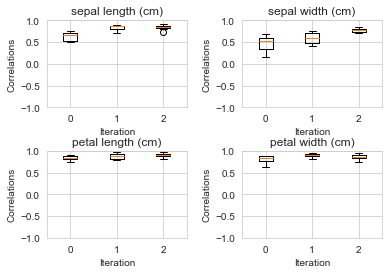

In [13]:
kernel.plot_correlations(wspace=0.4,hspace=0.5)

In [14]:
new_data = iris_amp.iloc[range(50)]

In [15]:
new_data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,NaN,3.5,1.4,0.2,0
1,NaN,3.0,1.4,0.2,0
2,4.7,3.2,1.3,NaN,0
3,4.6,3.1,1.5,0.2,NaN
4,5.0,NaN,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,NaN,3.4,1.4,NaN,NaN
7,5.0,3.4,NaN,0.2,0
8,4.4,2.9,1.4,NaN,0
9,4.9,NaN,1.5,0.1,0


In [16]:
new_data_imputed = kernel.impute_new_data(new_data)

In [18]:
new_completed_data = new_data_imputed.complete_data(0)

In [19]:
new_completed_data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,7.2,3.5,1.4,0.2,0
1,5.1,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.6,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.1,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,5.1,3.4,1.4,0.2,1
7,5.0,3.4,1.3,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.2,1.5,0.1,0
